# Исследование игровой индустрии

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными для прогноза продаж на 2017 год по данным 2016-го года.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#импортируем библиотеку pandas, matplotlib, scipy, seaborn
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

#используем параметр sep для разделения колонок 
#укажем два пути к файлу в случае ошибки 
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv("https://code.s3.yandex.net/datasets/games.csv")

In [2]:
#выведем первые 20 строчек таблицы на экран
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#выведем основную информацию о таблице с помощью метода info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датафрейм имеет 11 столбцов и 16715 строк данных. 

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

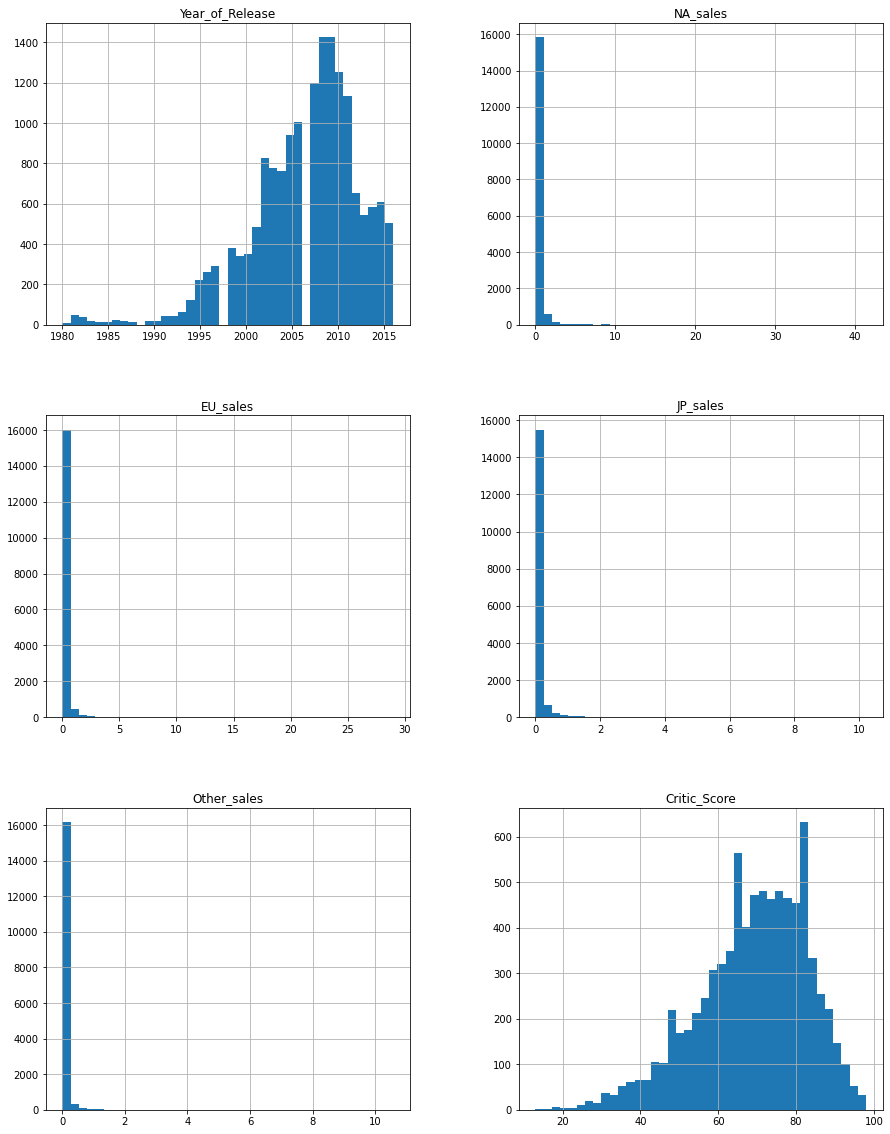

In [4]:
#построим общую гистограмму для всех столбцов таблицы
data.hist(bins=40, figsize=(15, 20))

### Предобработка данных
#### Изменение названий столбцов

In [5]:
#приведем все столбцы к нижнему регистру
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Удаление пропусков

In [7]:
#выведем количество пропущенных значений для каждого столбца
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
#найдем долю пропущенных значений для каждого столбца
round(data.isna().sum() / len(data) * 100, 2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

Не имеют пропуски следующие столбцы:
- платформа,
- продажи во всех странах.

In [9]:
#поищем количество одинаковых строк
data.duplicated().sum()

0

Одинаковые строки в датафрейме отсутствуют.\
Столбцы название и жанр игры имеют по 2 пропуска или долю 0,01 %. Удаление пропущенных значений не повлияет на выборку в целом. 

In [10]:
data = data.dropna(subset=['name', 'genre']).reset_index()

Изучим данные выборки из столбца **год выпуска** с помощью метода describe.

In [11]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Среднее арифметическое и медиана выборки столбца **год выпуска** практически совпадают, это говорит о малой доле выбросов. Поэтому можно заполнить пропущенные значения средним арифметическим значением.

In [12]:
#Заполним пропуски в столбце год выпуска средним арифметическим значением
data.loc[data['year_of_release'].isna(), 'year_of_release'] = data['year_of_release'].mean()

В столбце **рейтинг от организации ESRB** доля пропущенных значений составляет 40,48 %. Заменим значения на unknown. 

In [13]:
data['rating'] = data['rating'].fillna('unknown')
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [14]:
data.query('user_score == "tbd"').head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,119,Zumba Fitness,Wii,2010.000000,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,301,Namco Museum: 50th Anniversary,PS2,2005.000000,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,520,Zumba Fitness 2,Wii,2011.000000,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,645,uDraw Studio,Wii,2010.000000,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,657,Frogger's Adventures: Temple of the Frog,GBA,2006.486256,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Аббревиатура 'tbd' в столбце с оценкой пользователей может означать To Be Determined, то есть "Будет определено". Видимо, рейтинг в процессе формирования, пока данной категории игр можно присвоить рейтинг 0. 

In [15]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Пропущенные значения в столбцах **оценка критиков** и **оценка пользователей** составляют 51 и 40 %, удалить эти значения нельзя из-за большой доли в данных, заполнить медианным значением не получится в связи с искажением общей оценки. Оставим эти значения незаполненными. 

#### Изменение типов данных

In [16]:
#изменим тип данных в столбце год релиза на целочисленное число
data['year_of_release'] = data['year_of_release'].astype(int)

In [17]:
#изменим тип данных в столбце оценка пользователей на вещественное число
data['user_score'] = data['user_score'].astype(float)

Столбцы **название, жанр игры, рейтинг от организации ESRB** и **платформа** имеют тип данных object, столбцы содержат строки.\
Столбцы с **продажами** оставим вещественного типа, в них отображены данные в миллионах.\
В столбцах **оценка критиков** и **оценка пользователей** остались незаполненные значения NaN, тип данных может быть только вещественным числом.

#### Посчитайте и добавьте в таблицу столбец суммарные продажи во всех регионах

In [18]:
#посчитаем суммарные продажи
data['all_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

#### Причины пропусков 


При предобработке данных было выявлено 40-50 % пропусков значений в рейтингах игр. Это связано со многими факторами:
    
- При анализе **рейтинга от организации ESRB**, играм мог быть как не присвоен рейтинг (значение RP («Rating Pending») — «Рейтинг ожидается»), так и в Японии больше всего игр не оцененных по этому рейтингу (видимо, они применяют свой рейтинг – CERO).
    
- **Пользовательский рейтинг** так же имеет большую долю пропусков, в том числе встречается аббревиатура “tbd” (To Be Determined, то есть "Будет определено"). Возможно, похожая ситуация с рейтингом ESRB, когда у многих игр еще не определен рейтинг, поэтому информация не заполнена.

- Самый большой пропуск в **рейтинге критиков**, 51 %. Возможно эти пропуски связаны с тем, что не все игры получают оценку от критиков.
    
Также были пропущены значения в столбце **год выпуска игры**. Видимо в датасет были неправильно заполнены данные, что привело к пропускам в значениях.


In [19]:
#посчитаем зависисмость между наиболее пропущенными значениями
data[['critic_score', 'user_score']].isna().corr()

,critic_score,user_score
critic_score,1.000000,0.787411
user_score,0.787411,1.000000



   
Имеется сильная линейная зависимость между пропущенными значениями в столбцах пользовательский рейтинг и рейтинг критиков. 

### Проведите исследовательский анализ данных
#### Количество игр в разные годы

Составим столбчатый график, где отобразим зависимость выпуска игр с 1980 по 2016 годы.

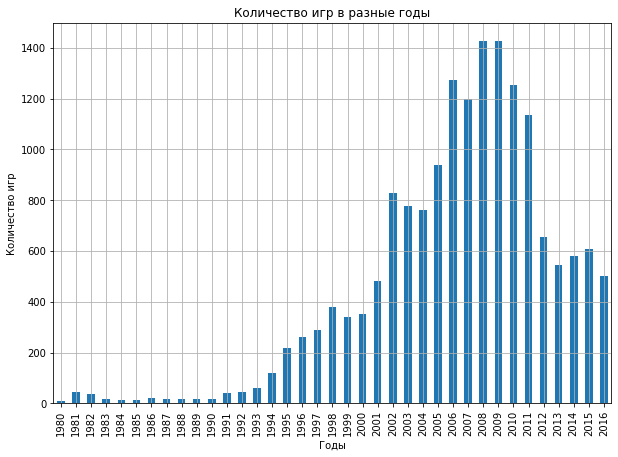

In [20]:
data.groupby('year_of_release')['year_of_release'].count()\
    .plot(kind='bar', figsize=(10,7), grid=True)
plt.title('Количество игр в разные годы')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

In [21]:
round(data.query('year_of_release < 1991')['year_of_release'].count() / data['year_of_release'].shape[0] * 100, 2)

1.32

До 1991 года игровая индустрия выпускала достаточно мало игр, меньше 50 в год. Для составления прогноза на 2017 год достаточно будет данных за предшествующие 26 лет.\
Игры, выпущенные до 1991 года, составляют 1,32 % от всех игр. Их можно не учитывать для дальнейшего анализа.\
Больше всего игр было выпущено в 2006-2011 гг.

#### Продажи по платформам за актуальный период

Найдем общие продажи игр на каждой платформе за все время, отобразив информацию на столбчатом графике.

In [22]:
#data.pivot_table(index='platform', values='all_sales', aggfunc=('sum', 'count'))\
#.sort_values('sum', ascending=False).head(10)

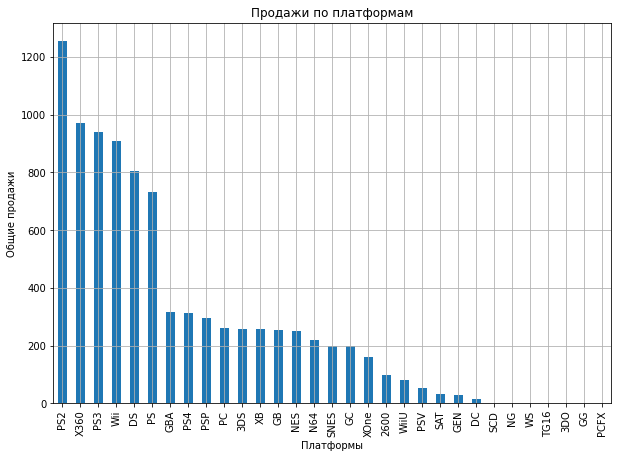

In [23]:
data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)\
    .plot(kind='bar', figsize=(10,7), grid=True)
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

Первые 6 платформ лидируют по суммарным продажам, сохраним их в отдельную переменную `top_platform`.

In [24]:
top_platform = data.groupby('platform')['all_sales']\
    .sum().sort_values(ascending=False).reset_index().head(6)['platform']
top_platform

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

Построим распределение по годам, отобразив 6 платформ на одном графике.

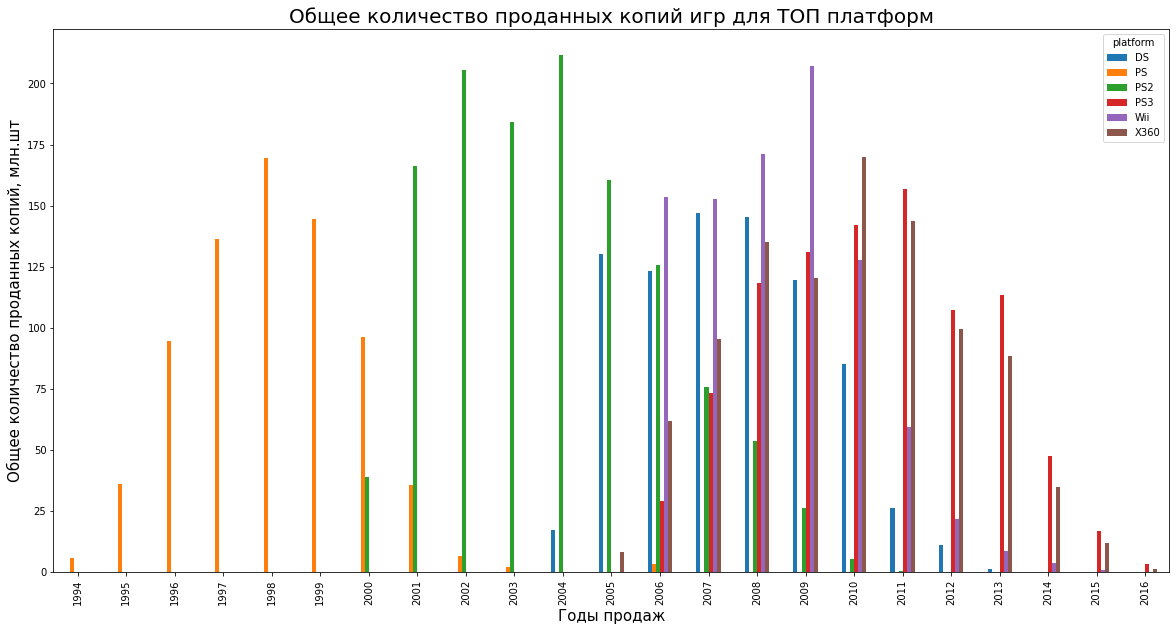

In [25]:
(data.query('year_of_release > 1990 and platform in @top_platform')\
    .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
).plot(kind='bar', figsize=(20, 10))
plt.title('Общее количество проданных копий игр для ТОП платформ', fontsize=20)
plt.xlabel('Годы продаж', fontsize=15)
plt.ylabel('Общее количество проданных копий, млн.шт', fontsize=15)
plt.show()

Можно выделить следующие характерные особенности:\
    1. средний цикл продаж игр на платформе составляет 10-12 лет;\
    2. платформа PS или Playstation выпускала игры на трех своих платформах:\
       - PS - в 1994-2006 гг.,\
       - PS2 - в 2000-2011 гг.,\
       - PS3 - в 2006-2016 гг.\
    Пик продаж игр на этих платформах был соответсвенно в 1998, 2004 и 2011 годах.\
    3. Лидерами по продажам стала платформа PS2, у нее максимальные общие продажи за все время существования платформ, и в 2004 году она продала больше всего млн. копий игр.

#### Выбор актуального периода для анализа
Потенциально прибыльными платформами на период с 2005 по 2016 год можно выделить три платформы:
 - X360,
 - PS3,
 - Wii.\
Наиболее прибыльной из них является платформа X360, суммарные продажи у нее выше, чем у остальных.\
Однако платформа Wii в 2009 году продала больше всех млн. копий игр.

Но на конец 2016 года продажи игр упали на всех перечисленных платформах. Также можно увидеть, что данные платформы уже действуют около 10 лет и скорее всего продажи на них в скором времени прекратятся.

Следовательно, для прогнозирования на 2017 год необходимо рассматривать актуальные данные за последние 3 года. Если продажи игр на платформе только увеличиваются, то для прогноза прибыльности лучше рассматривать эти платформы. В среднем, платформы достигают пика продаж игр на 3-7 году существования. 

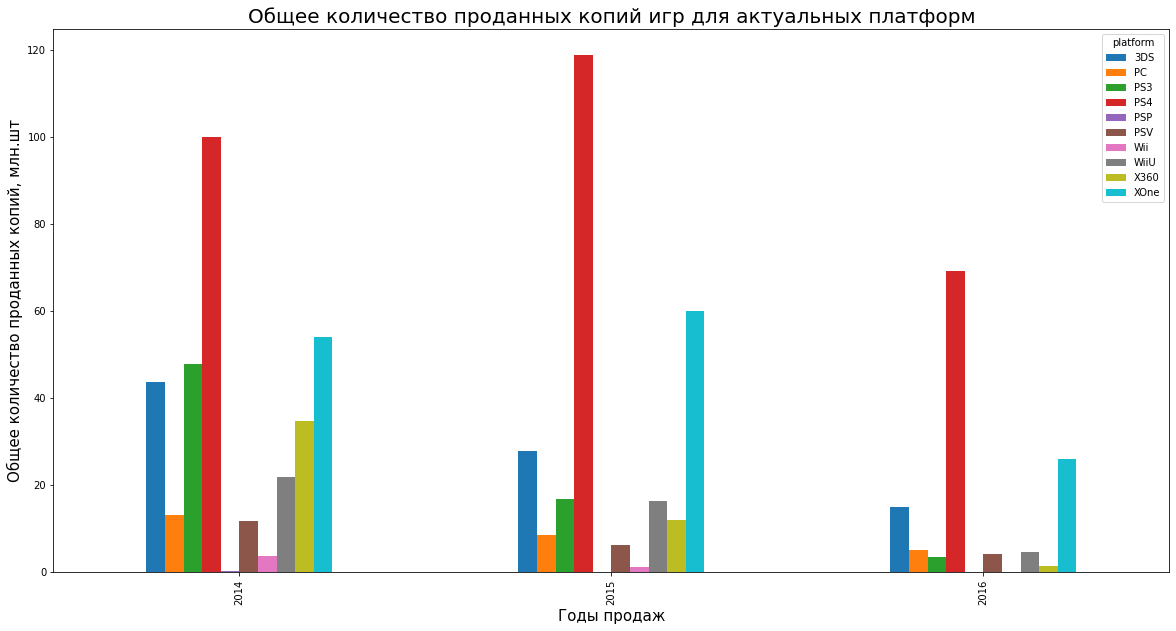

In [26]:
(data.query('year_of_release > 2013')\
    .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
).plot(kind='bar', figsize=(20, 10))
plt.title('Общее количество проданных копий игр для актуальных платформ', fontsize=20)
plt.xlabel('Годы продаж', fontsize=15)
plt.ylabel('Общее количество проданных копий, млн.шт', fontsize=15)
plt.show()

Потенциально прибыльными платформами являются платформы 3DS, PS4 и XOne.\
Рассмотрим также платформы X360, PS3 и построим по ним диаграммы размаха.

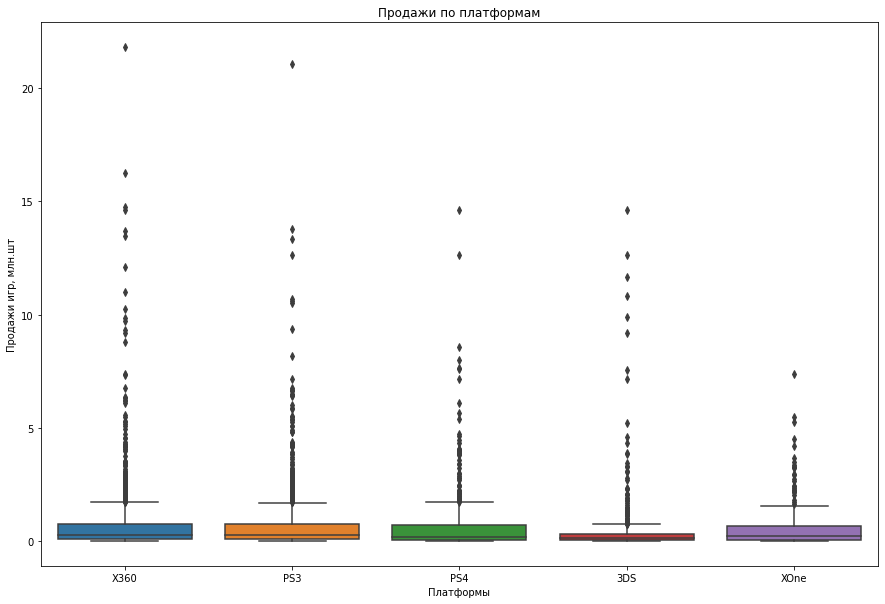

In [27]:
platform_list = data.query("platform in ['PS3','X360','PS4','3DS','XOne']")
plt.figure(figsize=(15, 10))
sns.boxplot(data=platform_list, x='platform', y='all_sales')\
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Продажи игр, млн.шт')
plt.show()

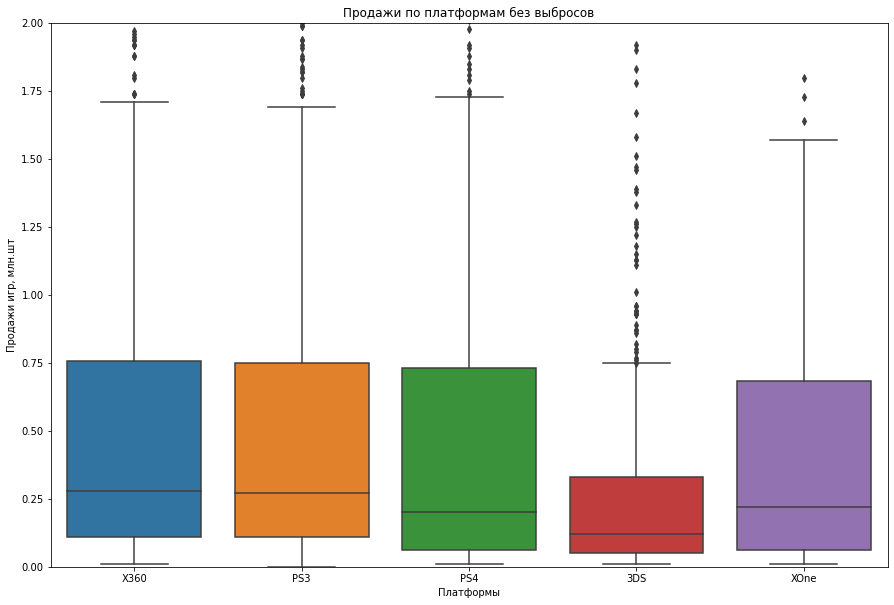

In [28]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=platform_list, x='platform', y='all_sales')\
    .set(ylim=(0, 2), title = 'Продажи по платформам без выбросов', xlabel = 'Платформы', ylabel = 'Продажи игр, млн.шт')
plt.show()

По пяти платформам можно проследить следующую закономерность:
 - основная доля продаж приходится на 0.1 - 0.75 млн. копий игр, на это указывает ящики Boxplot по платформам X360, PS3,  PS4,  и XOne;
 - продажи более 1,7 млн. копий (у платформы 3DS более 0,75 млн.копий) являются выбросами и сливаются в единую жирную линию: таких продаж очень много. И всё же значения, которые отсёк верхний «ус», — редкие.
 
При прогнозировании на 2017 год максимальное внимание можно уделить платформам X360 и PS3, у них были самые высокие показатели выбросов продаж, свыше 20 млн. копий игр. Но хороший потенциал роста имеют платформы PS4, 3DS и XOne, они новые, только развивающиеся и еще не скоро уйдут с игрового рынка.

#### Влияние на продажи отзывов пользователей и критиков

Рассмотрим влияние отзывов на продажи игр на **платформе PS4**.

In [29]:
#сделаем срез по платформе PS4
scatter_ps4 = data.query('year_of_release > 2013 and platform == "PS4"')[['critic_score', 'user_score', 'all_sales']]
scatter_ps4.head()

,critic_score,user_score,all_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66


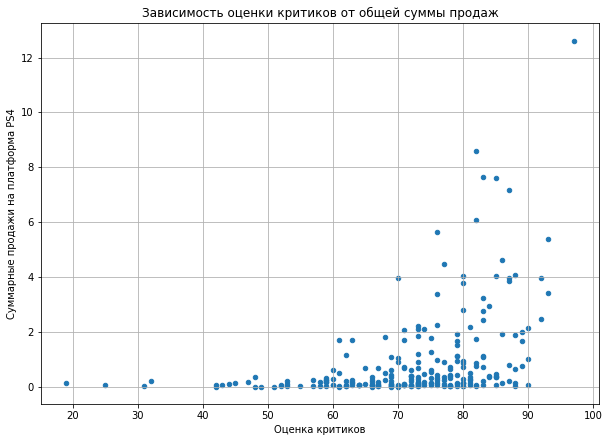

In [30]:
#с помощью графика рассеивания отобразим зависимость оценки критиков от общей суммы продаж
scatter_ps4.plot.scatter(x='critic_score', y='all_sales', grid=True, figsize=(10,7))
plt.title('Зависимость оценки критиков от общей суммы продаж')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи на платформа PS4')
plt.show()

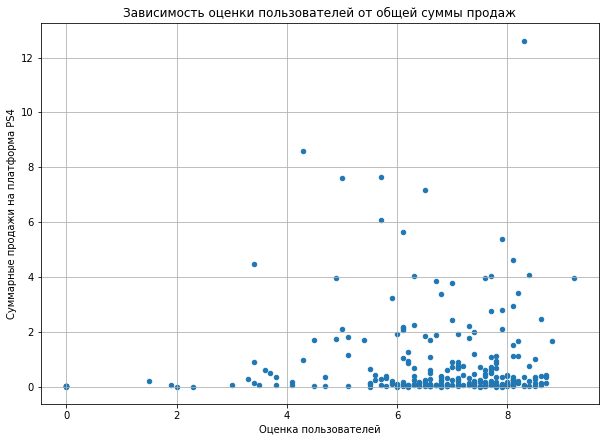

In [31]:
#с помощью графика рассеивания отобразим зависимость оценки пользователей от общей суммы продаж
scatter_ps4.plot.scatter(x='user_score', y='all_sales', grid=True, figsize=(10,7))
plt.title('Зависимость оценки пользователей от общей суммы продаж')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи на платформа PS4')
plt.show()

In [32]:
#посчитаем матрицу корреляции
scatter_ps4.corr() 

,critic_score,user_score,all_sales
critic_score,1.000000,0.504455,0.402661
user_score,0.504455,1.000000,0.018962
all_sales,0.402661,0.018962,1.000000


Рассматривая взаимосвязь оценки пользователей и критиков на суммарные продажи на **платформе PS4**, можно сделать следующий вывод:
- между оценкой пользователей и суммарными продажами практически отсутствует зависисмость, корреляция равна 0,02;
- кореляция между оценкой критиков и суммарными продажами равна 0,4, прослеживается небольшая зависимость.

Необходимо изучить влияние оценок на другую платформу, рассмотрим **платформу X360**.

In [33]:
#сделаем срез по платформе X360
scatter_x360 = data.query('year_of_release > 2013 and platform == "X360"')[['critic_score', 'user_score', 'all_sales']]
#посчитаем матрицу корреляции
scatter_x360.corr() 

,critic_score,user_score,all_sales
critic_score,1.000000,0.625309,0.525723
user_score,0.625309,1.000000,0.019421
all_sales,0.525723,0.019421,1.000000


Взаимосвязь оценки пользователей и критиков на суммарные продажи на **платформе X360** совпали с **платформой PS4**:
- между оценкой пользователей и суммарными продажами корреляция такая же маленькая, практически нулевая, и также равна 0,02;
- кореляция между оценкой критиков и суммарными продажами больше, чем у платформы PS4, она равна 0,5, но также прослеживается небольшая зависимость.

#### Распределение игр по жанрам

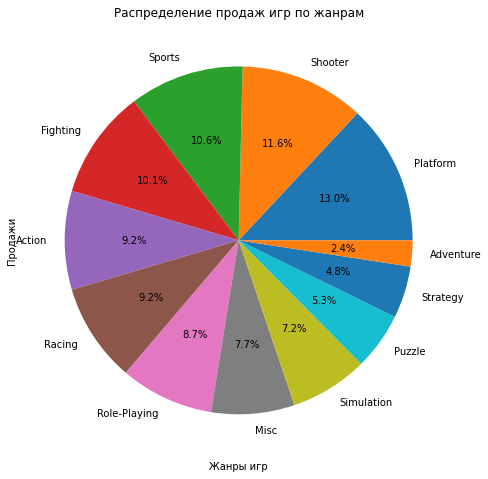

In [34]:
data.groupby('genre')['all_sales'].median().sort_values(ascending=False)\
    .plot(kind='pie', figsize=(10, 8), autopct='%1.1f%%')
plt.title('Распределение продаж игр по жанрам')
plt.xlabel('Жанры игр')
plt.ylabel('Продажи')
plt.show()

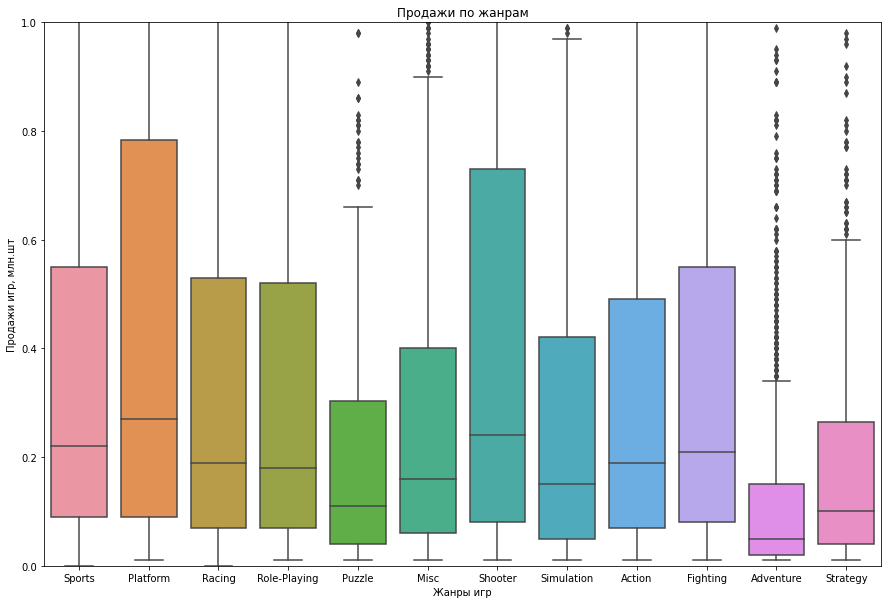

In [35]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='genre', y='all_sales')\
    .set(ylim=(0, 1), title = 'Продажи по жанрам', xlabel = 'Жанры игр', ylabel = 'Продажи игр, млн.шт')
plt.show()

Самыми популярными продаваемыми жанрами игр являются:
 - жанр Platform (прыжки по платформам);
 - жанр Shooter (стрелялки);
 - жанр Sports (спортивные стимуляторы);
 - жанр Fighting (борьба).

Самым непопулярным жанром является жанр Adventure (приключения).

### Портрет пользователя каждого региона
#### Топ-5 популярных платформ

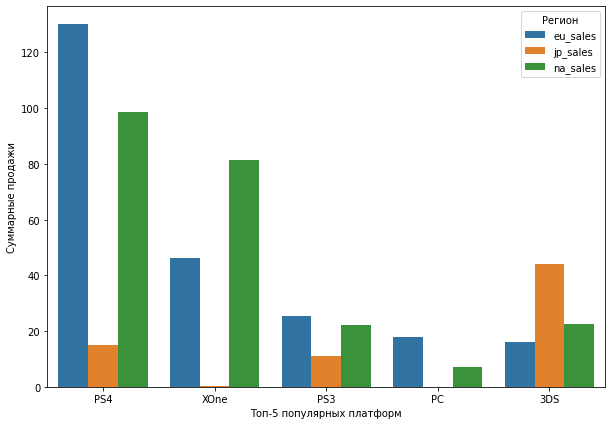

In [36]:
region_platform = data[data['year_of_release'] > 2013].groupby('platform')[['eu_sales', 'jp_sales', 'na_sales']]\
    .sum().sort_values(by='eu_sales', ascending=False).head().stack().reset_index()
region_platform.columns = ['Топ-5 популярных платформ', 'Регион', 'Суммарные продажи']

plt.figure(figsize=(10,7))
sns.barplot(data=region_platform, x='Топ-5 популярных платформ', y='Суммарные продажи', hue='Регион')
plt.show()

C 2014 по 2016 годы самые продаваемые платформы по регионам были следующие:\
у Северной Америки и у Европы - PS4 и XOne, у Японии - 3DS.

#### Топ-5 популярных жанров

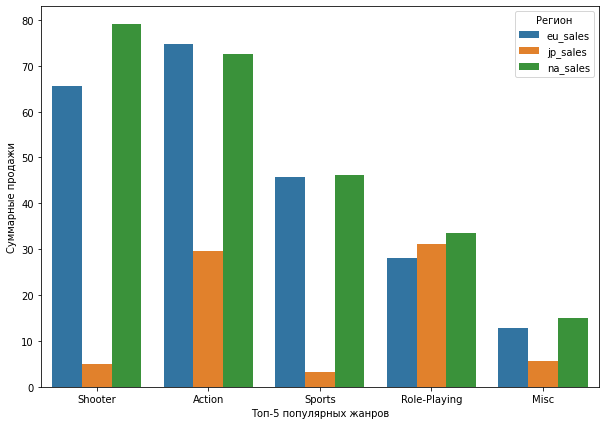

In [37]:
region_genre = data[data['year_of_release'] > 2013].groupby('genre')[['eu_sales', 'jp_sales', 'na_sales']].sum()\
    .sort_values(by='na_sales', ascending=False).head().stack().reset_index()
region_genre.columns = ['Топ-5 популярных жанров', 'Регион', 'Суммарные продажи']

plt.figure(figsize=(10,7))
sns.barplot(data=region_genre, x='Топ-5 популярных жанров', y='Суммарные продажи', hue='Регион')
plt.show()

C 2014 по 2016 годы самые популярные жанры по регионам были следующие:\
у Северной Америки - Shooter, у Европы - Action, у Японии - Role-Playing.

####  Зависимость рейтинга ESRB на продажи

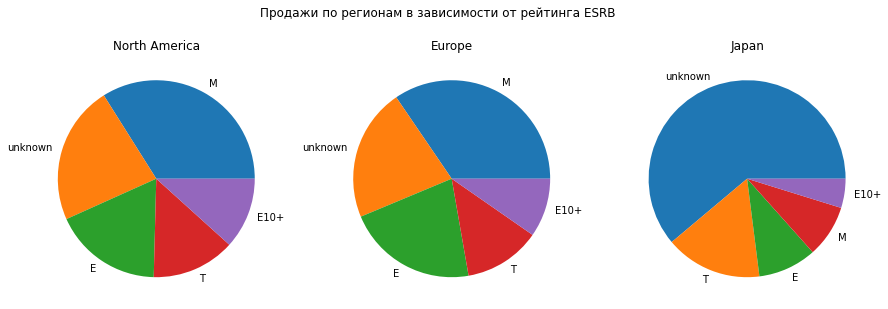

In [38]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
region_names = ['North America', 'Europe', 'Japan']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи по регионам в зависимости от рейтинга ESRB')
for i in range(3):
    data_region = (data[data['year_of_release'] > 2013].groupby('rating')[regions[i]].sum()\
            .reset_index()\
            .sort_values(regions[i], ascending = False, ignore_index = True))

    axs[i].pie(data_region[regions[i]], labels = data_region['rating'])
#Зададим название региона
    axs[i].set_title(region_names[i])
plt.show()

У Северной Америки и у Европы совпадают продажи по регионам в зависимости от рейтинга ESRB:
 - M («Mature») — «Для взрослых»;
 - E («Everyone») — «Для всех»;
 - T («Teen») — «Подросткам».\
Большую долю занимает категория пропущеенных значений, которую мы определили как unknown.

У Японии же основная доля продаж - категория unknown. Скорее всего в Японии не доверяют рейтингу ESRB и у них есть какой-либо свой рейтинг, например, CERO. 

### Проверка гипотез
#### Гипотеза 1. 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

```
H_0: Среднее пользовательского рейтинга платформы Xbox One = среднему пользовательского рейтинга платформы PC`
H_a: Среднее пользовательского рейтинга платформы Xbox One ≠ среднему пользовательского рейтинга платформы PC`
alpha = 0.05
```

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам применяется специальный метод:
`scipy.stats.ttest_ind (array1, array2, equal_var)`

In [39]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data.query('year_of_release > 2013 and platform == "XOne"')['user_score'].dropna(),\
                       data.query('year_of_release > 2013 and platform == "PC"')['user_score'].dropna(), equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print('p-значение:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.585620476179421
Не получилось отвергнуть нулевую гипотезу


Среднее пользовательского рейтинга платформы Xbox One равно среднему пользовательского рейтинга платформы PC`.

#### Гипотеза 2. 

Средние пользовательские рейтинги жанров Action и Sports разные.

```
H_0: Среднее пользовательского рейтинга жанра Action = среднему пользовательского рейтинга жанра Sports`
H_a: Среднее пользовательского рейтинга жанра Action ≠ среднему пользовательского рейтинга жанра Sports`
alpha = 0.05
```

Применим тот же метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:
`scipy.stats.ttest_ind (array1, array2, equal_var)`

In [40]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data.query('year_of_release > 2013 and genre == "Action"')['user_score'].dropna(),\
                       data.query('year_of_release > 2013 and genre == "Sports"')['user_score'].dropna(), equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print('p-значение:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.966812188237664e-06
Отвергаем нулевую гипотезу


Действительно, средние пользовательские рейтинги жанров Action и Sports разные.


   
Так как обе генеральные совокупности большие, то придётся сравнивать их средние по выборкам из каждой совокупности. В этом случае точно не обойтись без статистического теста, а именно двухвыборочный t-критерий. 

Чтобы результаты двухвыборочного t-критерия были достоверными, должны выполняться следующие условия:

 - Наблюдения в одной выборке не должны зависеть от наблюдений в другой выборке.
 - Данные должны быть приблизительно нормально распределены.
 - Две выборки должны иметь примерно одинаковую дисперсию (если нет, то equal_var принимает значение False).
 - Данные в обеих выборках были получены методом случайной выборки .
    


### Общий вывод

При исследовании игровой индустрии по данным с 1980 по 2016 годы для прогноза продаж на 2017 год было выявлено следующее.
 1.	При предобработке данных было выявлено 40-50 % пропусков значений в рейтингах игр. Это связано со многими факторами:\
  1.1	При анализе рейтинга от организации ESRB, играм мог быть как не присвоен рейтинг (значение RP  («Rating Pending») — «Рейтинг ожидается»), так и в Японии больше всего игр не оцененных по этому рейтингу (видимо, они применяют свой рейтинг – CERO).\
  1.2	Пользовательский рейтинг так же имеет большую долю пропусков, в том числе встречается аббревиатура “tbd” (To Be Determined, то есть "Будет определено").
 2.	При исследовании данных было выявлено следующее:\
  2.1. До 1991 года игровая индустрия выпускала достаточно мало игр, меньше 50 в год.\
  2.2. Больше всего игр было выпущено в 2006-2011 гг., этот период совпадает с бумом одновременного выхода большого количества игровых платформ на рынок (PlayStation 2 и 3, Xbox 360, Wii и DS от Nintendo). Также максимальные суммарные продажи миллион копий игр были именно по этим приставкам.\
  2.3. Каждая платформа имеет свой средний срок службы, а именно 10-12 лет.\
  2.4. Абсолютным лидером по продажам за все время стала платформа PS2, в 2004 году она продала больше всего млн. копий игр.\
  2.5. При прогнозировании на 2017 год максимальное внимание можно уделить платформам X360 и PS3, у них были самые высокие показатели выбросов продаж, свыше 20 млн. копий игр. Но хороший потенциал роста имеют платформы PS4, 3DS и XOne, они новые, только развивающиеся и еще не скоро уйдут с игрового рынка.
 3. Влияние на продажи внешних факторов:\
  3.1. Оценка пользователей совершенно не влияет на продажи.\
  3.2. Оценка критиков имеет небольшое влияние на продажи.
 4. Самыми популярными продаваемыми жанрами игр являются: жанр Platform, жанр Shooter, жанр Sports, жанр Fighting.
 5. Портрет пользователя каждого региона:\
  5.1. Самые продаваемые платформы по регионам были следующие:\
у Северной Америки и у Европы - PS4 и XOne, у Японии - 3DS.\
  5.2. Cамые популярные жанры по регионам были следующие: у Северной Америки - Shooter, у Европы - Action, у Японии - Role-Playing.\
  5.3. У Северной Америки и у Европы совпадают продажи по регионам в зависимости от рейтинга ESRB: M («Mature»), E («Everyone»), T («Teen»).
 6. Проверка гипотез:\
  6.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
  6.2. Средние пользовательские рейтинги жанров Action и Sports разные.
